In [1]:
import os
import pandas as pd

In [2]:
# look at the file name
names = os.listdir('input');
names

['Bank_Personal_Loan_Modelling.xlsx', 'tops_plt.png']

In [3]:
#get the path to the file
path = 'input/' + names[0]
path

'input/Bank_Personal_Loan_Modelling.xlsx'

In [4]:
df = pd.read_excel(path, 'Data')

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Variables definition


> - **ID** - Customer ID 
> - **Age** - Customer's age in completed years 
> - **Experience** - #years of professional experience 
> - **Income** - Annual income of the customer - in thousands usd 
> - **ZIPCode** - Home Address ZIP code. 
> - **Family** - Family size of the customer 
> - **CCAvg** - Avg. spending on credit cards per month - in thousands usd 
> - **Education** - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
> - **Mortgage** - Value of house mortgage if any - in thousands usd  
> - **Personal Loan**  - Did this customer accept the personal loan offered in the last campaign? 
> - **Securities Account** - Does the customer have a securities account with the bank? 
> - **CD Account** - Does the customer have a certificate of deposit (CD) account with the bank? 
> - **Online** - Does the customer use internet banking facilities? 
> - **CreditCard** - Does the customer uses a credit card issued by UniversalBank?

In [6]:
#for more convinient - reposition "Personal Loan"  column since it is our target column for research
a = df['Personal Loan']
df.drop('Personal Loan', axis = 1, inplace = True)
df['Personal Loan'] = a

In [7]:
df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0


## Assess Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Personal Loan         5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


> **Observation**
> - No null values
> - No missing values
> - Columns "ID", "ZIP Code", are nominal variables. Should be in 'str' type

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


> **Observation**
> - Column "Experience" has some negative value. Need to fix
> - Column "Mortgage" - has very big outliers. Need to standartize
> - Binary variables "Personal Loan", "CreditCard", "Online", "CD Account", "Securities Account" has clean data
> - Ordinary Cat variables "Family" and "Education" are clean too  

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

Text(0.5,0,'Experience distribution')

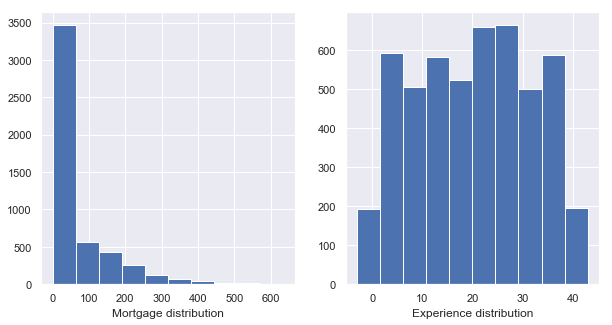

In [70]:
#cols = ['Experience', 'Mortgage']
fig, [ax0, ax1] = plt.subplots(1,2, figsize = (10,5))
ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')

C:\Alex\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


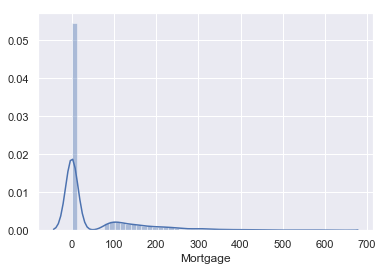

In [12]:
sns.distplot(df.Mortgage)


C:\Alex\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


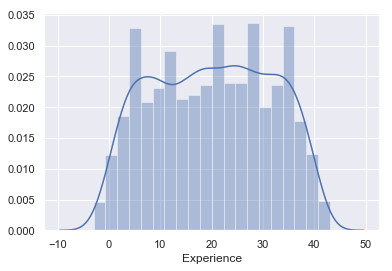

In [13]:
sns.distplot(df.Experience)